# Algoritmo de Grover

*Ciencias Naturales y Tecnología*

Sergio Tello

---

Algoritmo cuántico para búsqueda desarrollado por Lov Grover en 1996.

<img src='grover.jpg' align='center' width='250'>
<p style="text-align: center;">Lov Grover</p>

Si nos dan una función $f:\{0,1\}^n \rightarrow \{0,1\}$ el algoritmo de Grover responde a la pregunta:


**¿Para cuáles cadenas $\mathbf{x}$ del conjunto de salida se tiene que $f(\mathbf{x}) = 1$?**

Observaciones:

* Lo más común es que sea una función que cumpla $f(\mathbf{x}) = 1$ para sólo una cadena y el objetivo será encontrar el valor de esa cadena $\mathbf{x}$. 

* Si se cumple lo anterior debemos tener en cuenta que *clásicamente* el valor esperado del número de veces que debemos consultar el oráculo antes de hallar la cadena ganadora es igual a:

$$\frac{2^n + 1}{2}$$

* Usando el algoritmo de Grover el número de veces que debemos consultar el oráculo es de máximo:

$$\left\lceil \frac{\pi}{4}\sqrt{2^n} \right\rceil$$

En esta tabla podemos ver la comparación entre estas dos cantidades para distintos valores de $n$: 

| $n$  | Número de cadenas | Clásico | Cuántico |
| ---- | ----------------- | ------- | -------- |
| 2    |    4              |   3     | 2        |
| 3    |    8              |   5     | 3        |
| 4    |    16             |  9      | 4        |
| 5    |    32             |  17     | 5        |
| 6    |    64             |  33     | 7        |
| 7    |    128            |  65     | 9        |
| 8    |    256            |  129    | 13       |
| 9    |    512            |  257    | 18       | 
| 10   |    1024           |  513    | 26       | 

<p style="text-align: center;">Número de consultas al oráculo</p>

In [1]:
# Importación de librerías
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram

In [2]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
%matplotlib inline
import numpy as np
def decimal_a_binario(n, k):
    '''
    Esta función recibe una longitud n y un entero k. Retorna una lista de longitud n tal que cada elemento
    es un dígito de la representación binaria de k.
    '''
    
    lista_binaria = []
    
    for i in reversed(range(n)):
        bit = k // 2**i
        k = k % 2**i
        lista_binaria.append(bit)
    
    return lista_binaria
def evaluar_oraculo_en_c(oraculo, c):
    
    
    tam = oraculo.num_qubits   # Tamaño o número de qubits que abarca el oráculo. No cambiar.
    
    ## Declaren el circuito cuántico con los parámetros adecuados:
    circuito = QuantumCircuit(len(c)+1, 1)      
    
    ## Inicialización
    ## Usen este ciclo for y un condicional if dentro del for para inicializar con el valor de c 
    ## los alambres superiores según los bits contenidos en la lista c. 
    for i in range(len(c)):
        circuito.x(i) if c[i] == 1 else None
            
    # Insertar circuito. No cambiar el segundo parámetro.
    circuito.append(oraculo, list(range(tam)))
    
    ## Medición
    ## Añadan la medición con los parámetros adecuados:
    circuito.measure(len(c), 0)
    
    ## Realización de la simulación con 1 shot 
    simulador = Aer.get_backend('qasm_simulator')
    conteos = execute(circuito, backend=simulador, shots=1).result().get_counts()
    valor_orac_en_c = int(list(conteos.keys())[0]) # No cambiar. Extrae del diccionario el estado medido
    
    ## Retornar lo solicitado en las indicaciones
    return valor_orac_en_c
def tabular_oraculo(oraculo):
    '''
    Esta función recibe como argumento una compuerta cuántica (oráculo) e imprime la tabulación de los valores
    de f para toda cadena en su dominio.
    '''
    n = oraculo.num_qubits - 1   # Determina la longitud de las cadenas de 0s y 1s en el conjunto de salida de f.
    
    ## Crear un print que escriba el título de la tabulación según lo pedido en las indicaciones
    
    print("Tabla de valores de la función f:{0, 1}^"+str(n)+" ---> {0, 1}")
    
    # Este ciclo for debe recorrer los enteros de 0 a 2^n - 1. Notemos que al pasar esos números 
    # a binario obtendremos todas las posibles cadenas de 0s y 1s de longitud n. 
    # (Desde 00...0 hasta 11...1)
     
    # Completar 
    for i in range(2**n):
        
        ## Completar con los parámetros adecuados para obtener una lista que contenga la 
        ## representación binaria del contador del ciclo.
        s = decimal_a_binario(n, i)
        
        ## La variable 'valor' debe corresponder al valor de f(s) y debe hallarse usando la 
        ## función del ejercicio anterior
        valor = evaluar_oraculo_en_c(oraculo, s)
        
        lista_a_cadena = ''.join([str(bit) for bit in s]) # Simplemente convierte la lista s a cadena para su
                                                          # uso en el print. No cambiar.
        
        ## Completar el print para que escriba la línea solicitada en las indicaciones.
        print("f({}) = {}".format(lista_a_cadena, valor))
       
    return

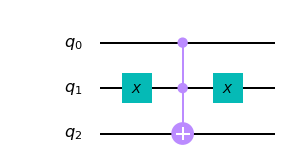

In [3]:
circuito1 = QuantumCircuit(3)
circuito1.x(1)
circuito1.ccx(0, 1, 2) 
#circuito1.cx(1, 2)
circuito1.x(1)

circuito1.draw(output='mpl')

Este circuito codifica la función $f:\{0,1\}^2 \rightarrow \{0,1\}$ para la cual: $f(10) = 1$ y $f(x) = 0$ para las otras 3 cadenas $x$ de longitud 2.

In [4]:
orac_1 = circuito1.to_gate()
orac_1.name = 'Oráculo Grover'

### Tabulación clásica del oráculo (no es el algoritmo de Grover)

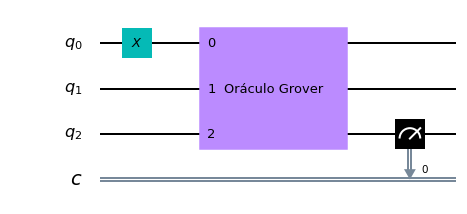

In [5]:
tabular_f = QuantumCircuit(3, 1)
tabular_f.x(0)
#tabular_f.x(1)

tabular_f.append(orac_1, [0, 1, 2])
tabular_f.measure(2, 0)
tabular_f.draw(output='mpl')

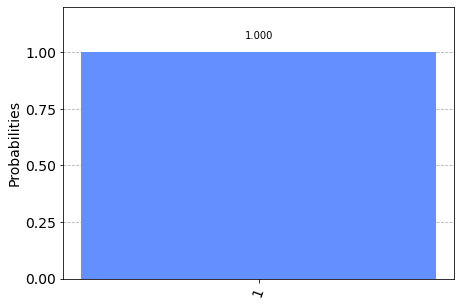

In [6]:
simulador = Aer.get_backend('qasm_simulator')
conteos = execute(tabular_f, backend=simulador, shots=1).result().get_counts()
plot_histogram(conteos)

**Fin del demo de tabulación clásica**

## Operador de difusión
Este operador es el que diferencia al algoritmo de Grover del algoritmo de Deutsch-Jozsa

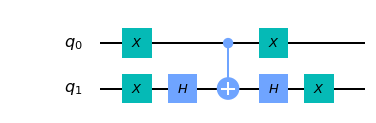

In [7]:
c_oper1 = QuantumCircuit(2)
c_oper1.x([0, 1])
#c_oper1.barrier()
c_oper1.h(1)
c_oper1.cx(0, 1)
c_oper1.h(1)
#c_oper1.barrier()
c_oper1.x([0, 1])
c_oper1.draw(output='mpl')

In [8]:
dif_1 = c_oper1.to_gate()
dif_1.name = 'Difusión'

## Circuito del algoritmo de Grover

In [9]:
grover1 = QuantumCircuit(3, 2)
grover1.x(2)
grover1.barrier()
grover1.h([0, 1, 2])
##
grover1.append(orac_1, [0, 1, 2])
grover1.h([0, 1])
grover1.append(dif_1, [0, 1])
grover1.h([0, 1])
##
grover1.measure([0, 1], [0, 1])

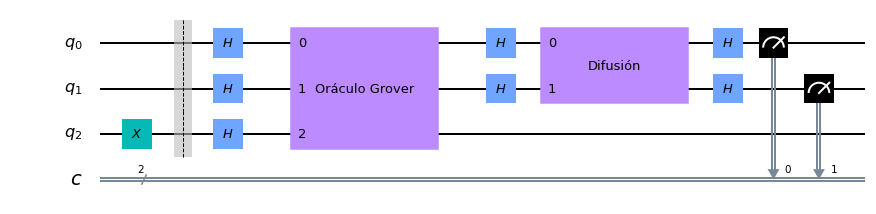

In [10]:
grover1.draw(output='mpl')

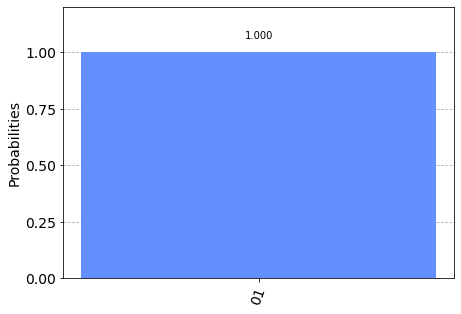

In [11]:
simulador = Aer.get_backend('qasm_simulator')
conteos1 = execute(grover1, backend=simulador, shots=1000).result().get_counts()
plot_histogram(conteos1)

Podemos ver que nuestro estado de salida es el $10$, el cual corresponde a la cadena que hace que $f(10) = 1$.

## Demo del algoritmo de Grover para $n=4$

In [3]:
circuito = QuantumCircuit(5)
circuito.x(1)
circuito.mct([0, 1, 2, 3], 4) # Multicontrolled Toffoli
circuito.x(1)

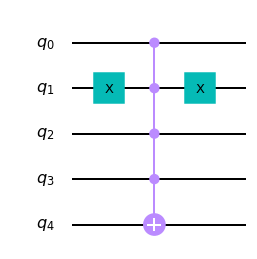

In [4]:
circuito.draw(output='mpl')

In [5]:
oraculogrover5 = circuito.to_gate()
oraculogrover5.name = "oraculo grover 5"

In [6]:
tabular_oraculo(oraculogrover5)

Tabla de valores de la función f:{0, 1}^4 ---> {0, 1}
f(0000) = 0
f(0001) = 0
f(0010) = 0
f(0011) = 0
f(0100) = 0
f(0101) = 0
f(0110) = 0
f(0111) = 0
f(1000) = 0
f(1001) = 0
f(1010) = 0
f(1011) = 1
f(1100) = 0
f(1101) = 0
f(1110) = 0
f(1111) = 0


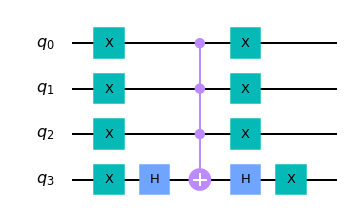

In [7]:
cq2 = QuantumCircuit(4)
cq2.x([0,1,2,3])

cq2.h(3)
cq2.mct([0,1,2],3)
cq2.h(3)

cq2.x([0,1,2,3])
cq2.draw('mpl')

In [8]:
difusion5 = cq2.to_gate()
difusion5.name = "difusion 5"

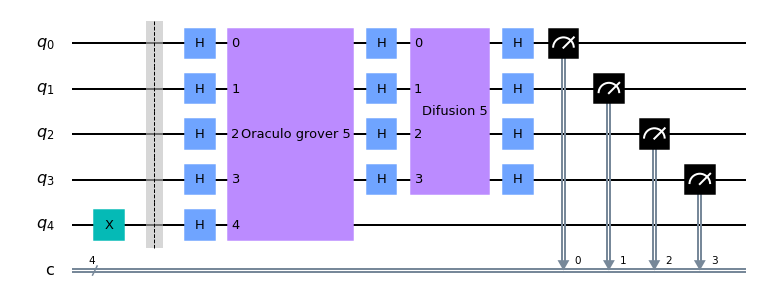

In [9]:
grover4 = QuantumCircuit(5, 4)
grover4.x(4)
grover4.barrier()
grover4.h([0, 1, 2, 3, 4])
##
grover4.append(oraculogrover5, [0, 1, 2,3,4])
grover4.h([0, 1,2,3])
grover4.append(difusion5, [0, 1,2,3])
grover4.h([0, 1,2,3])
##
grover4.measure([0, 1,2,3], [0, 1,2,3])
grover4.draw('mpl')

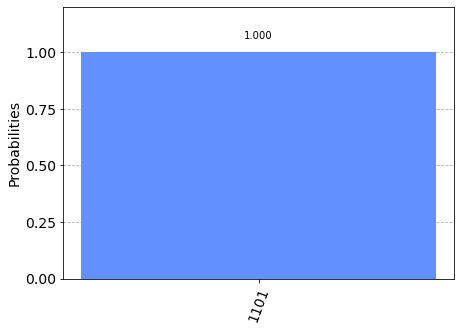

In [15]:
simulador = Aer.get_backend('qasm_simulator')
conteos1 = execute(grover4, backend=simulador, shots=1).result().get_counts()
plot_histogram(conteos1)

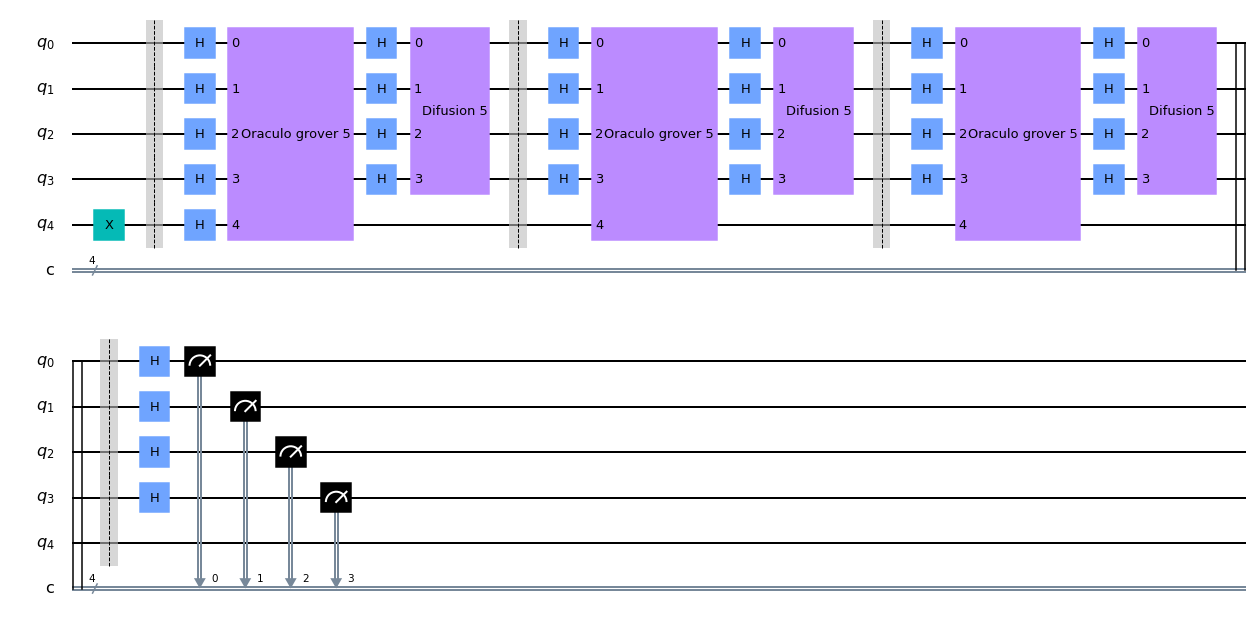

In [31]:
grover41 = QuantumCircuit(5, 4)
grover41.x(4)
grover41.barrier()
grover41.h([0, 1, 2, 3, 4])
##
for i in range(3):
    grover41.append(oraculogrover5, [0, 1, 2,3,4])
    grover41.h([0, 1,2,3])
    grover41.append(difusion5, [0, 1,2,3])
    grover41.barrier()
    grover41.h([0, 1,2,3])
##



##
grover41.measure([0, 1,2,3], [0, 1,2,3])
grover41.draw('mpl')

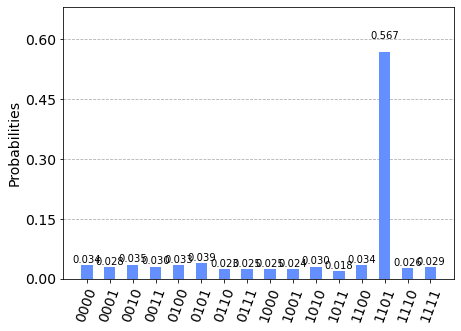

In [30]:
simulador = Aer.get_backend('qasm_simulator')
conteos1 = execute(grover41, backend=simulador, shots=1000).result().get_counts()
plot_histogram(conteos1)

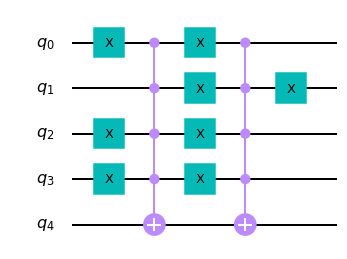

In [38]:
circuito2 = QuantumCircuit(5)
circuito2.x([0,2,3])

circuito2.mct([0, 1, 2, 3], 4) # Multicontrolled Toffoli
circuito2.x([0,2,3])
circuito2.x(1)
circuito2.mct([0,1,2,3],4)
circuito2.x(1)
circuito2.draw(output='mpl')

In [39]:
oracgr2 = circuito2.to_gate()
oracgr2.name = "oraculo grover 4"

In [40]:
tabular_oraculo(oracgr2)

Tabla de valores de la función f:{0, 1}^4 ---> {0, 1}
f(0000) = 0
f(0001) = 0
f(0010) = 0
f(0011) = 0
f(0100) = 1
f(0101) = 0
f(0110) = 0
f(0111) = 0
f(1000) = 0
f(1001) = 0
f(1010) = 0
f(1011) = 1
f(1100) = 0
f(1101) = 0
f(1110) = 0
f(1111) = 0


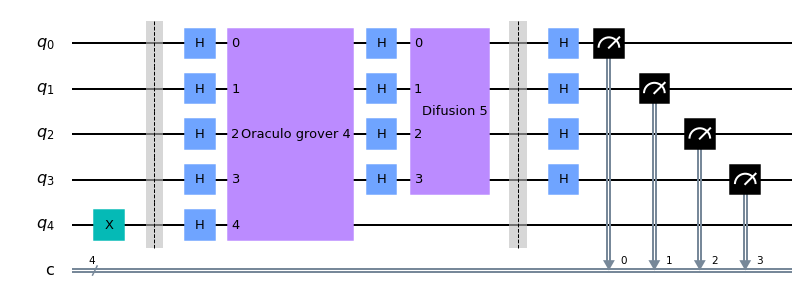

In [56]:
grover42 = QuantumCircuit(5, 4)
grover42.x(4)
grover42.barrier()
grover42.h([0, 1, 2, 3, 4])
##
for i in range(1):
    grover42.append(oracgr2, [0, 1, 2,3,4])
    grover42.h([0, 1,2,3])
    grover42.append(difusion5, [0, 1,2,3])
    grover42.barrier()
    grover42.h([0, 1,2,3])
##



##
grover42.measure([0, 1,2,3], [0, 1,2,3])
grover42.draw('mpl')

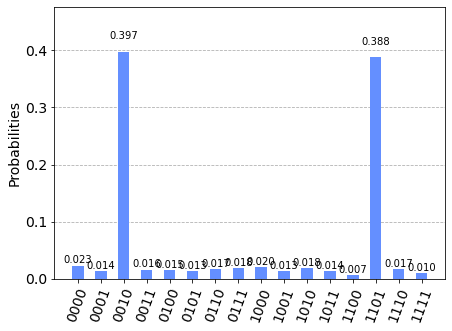

In [57]:
simulador = Aer.get_backend('qasm_simulator')
conteos1 = execute(grover42, backend=simulador, shots=1000).result().get_counts()
plot_histogram(conteos1)

## Aplicacion: Algoritmo Grover Sudoku

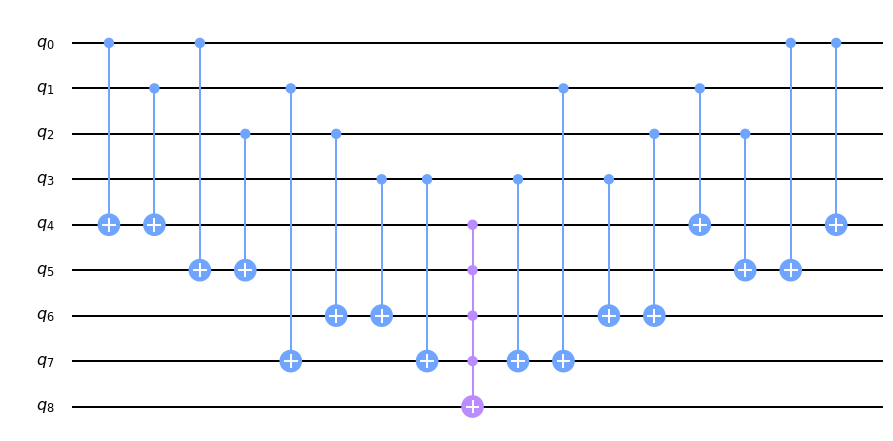

In [3]:
sudoku = QuantumCircuit(9)
sudoku.cx(0,4)
sudoku.cx(1,4)
sudoku.cx(0,5)
sudoku.cx(2,5)

sudoku.cx(2,6)
sudoku.cx(3,6)
sudoku.cx(1,7)
sudoku.cx(3,7)

sudoku.mct([4,5,6,7],8)
sudoku.cx(3,7)
sudoku.cx(1,7)
sudoku.cx(3,6)
sudoku.cx(2,6)
sudoku.cx(2,5)
sudoku.cx(0,5)
sudoku.cx(1,4)
sudoku.cx(0,4)
sudoku.draw('mpl')

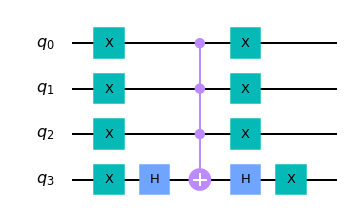

In [5]:
sq2 = QuantumCircuit(4)
sq2.x([0,1,2,3])

sq2.h(3)
sq2.mct([0,1,2],3)
sq2.h(3)

sq2.x([0,1,2,3])
sq2.draw('mpl')

In [6]:
difusion8 = sq2.to_gate()
difusion8.name = "difusion 8"

In [7]:
sudokup = sudoku.to_gate()
sudokup.name = "sudoku"

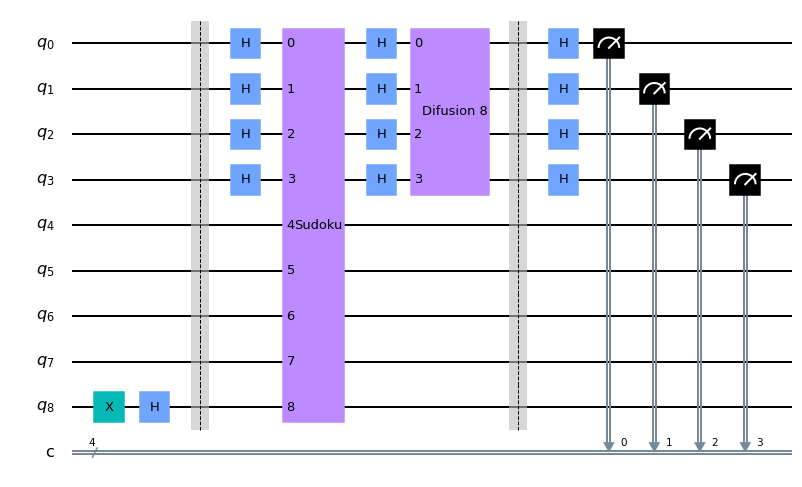

In [9]:
grover43 = QuantumCircuit(9, 4)
grover43.x(8)
grover43.h(8)
grover43.barrier()
grover43.h([0, 1, 2, 3])
##
for i in range(1):
    grover43.append(sudokup, [0, 1, 2,3,4,5,6,7,8])
    grover43.h([0, 1,2,3])
    grover43.append(difusion8, [0, 1,2,3])
    grover43.barrier()
    grover43.h([0, 1,2,3])
##



##
grover43.measure([0, 1,2,3], [0, 1,2,3])
grover43.draw('mpl')

In [10]:
simulador = Aer.get_backend('qasm_simulator')
conteos1 = execute(grover43, backend=simulador, shots=10000).result().get_counts()
print(conteos1)

{'0000': 135, '0001': 146, '0010': 149, '0011': 156, '0100': 155, '0101': 162, '0110': 3930, '0111': 151, '1000': 143, '1001': 3983, '1010': 158, '1011': 140, '1100': 157, '1101': 147, '1110': 138, '1111': 150}


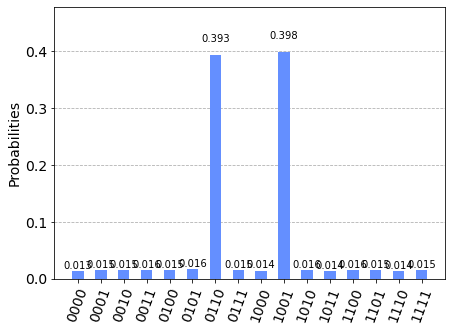

In [12]:
plot_histogram(conteos1)

## Lights out

In [ ]:
lightsout = QuantumCircuit(19)
